# 🏦 Mini Projet : Système de Gestion de Compte Bancaire

**Étape 1 : Version naïve (sans design pattern)**

*Code*

In [14]:
class Compte:
    def __init__(self):
        self.solde = 0
        self.operations = []

    def deposer(self, montant):
        self.solde += montant
        self.operations.append(f"+{montant}dt")

    def retirer(self, montant):
        self.solde -= montant
        self.operations.append(f"-{montant}dt")

# Exemple
c1 = Compte()
c2 = Compte()
c1.deposer(100)
c2.retirer(50)

print(c1.solde)  # 100
print(c2.solde)  # -50


100
-50


*UML*

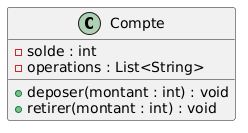



* Problème : plusieurs instances → incohérence.



**Étape 2 : Singleton**

*Code*

In [15]:
class CompteSingleton:
    _instance = None

    def __new__(cls):
        if cls._instance is None:
            print("Création de l'unique instance CompteSingleton")
            cls._instance = super().__new__(cls)
            cls._instance.solde = 0
            cls._instance.operations = []
        return cls._instance

    def deposer(self, montant):
        self.solde += montant
        self.operations.append(f"+{montant}dt")

    def retirer(self, montant):
        self.solde -= montant
        self.operations.append(f"-{montant}dt")

# Exemple
c1 = CompteSingleton()
c2 = CompteSingleton()
c1.deposer(100)
print(c2.solde)  # 100 → même instance


Création de l'unique instance CompteSingleton
100


*UML*

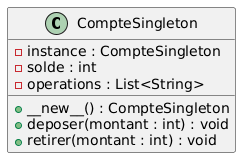

*  Apport : une seule instance partagée.



**Étape 3 : Observer**

*Sujet Observable(Code)*




In [6]:
class Observable:
    def __init__(self):
        self.observers = []

    def add(self, obs):
        self.observers.append(obs)

    def notify(self, type_op, montant, solde):
        for obs in self.observers:
            obs.update(type_op, montant, solde)


*Compte Observable(Code)*

In [7]:
class Compte(Observable):
    def __init__(self):
        super().__init__()
        self.solde = 0
        self.operations = []

    def deposer(self, montant):
        self.solde += montant
        self.operations.append(f"+{montant}dt")
        self.notify("depot", montant, self.solde)

    def retirer(self, montant):
        self.solde -= montant
        self.operations.append(f"-{montant}dt")
        self.notify("retrait", montant, self.solde)


*Observateurs(Code)*

In [8]:
class SoldeView:
    def update(self, type_op, montant, solde):
        print(f"[SOLDE] {solde}dt")

class OpsView:
    def update(self, type_op, montant, solde):
        print(f"[OPERATION] {type_op} {montant}dt")

class AlertView:
    def update(self, type_op, montant, solde):
        if solde < 0:
            print("⚠️ ALERTE : solde négatif !")


*Exemple*


In [9]:
c = Compte()
c.add(SoldeView())
c.add(OpsView())
c.add(AlertView())

c.deposer(100)
c.retirer(150)


[SOLDE] 100dt
[OPERATION] depot 100dt
[SOLDE] -50dt
[OPERATION] retrait 150dt
⚠️ ALERTE : solde négatif !


 *UML*

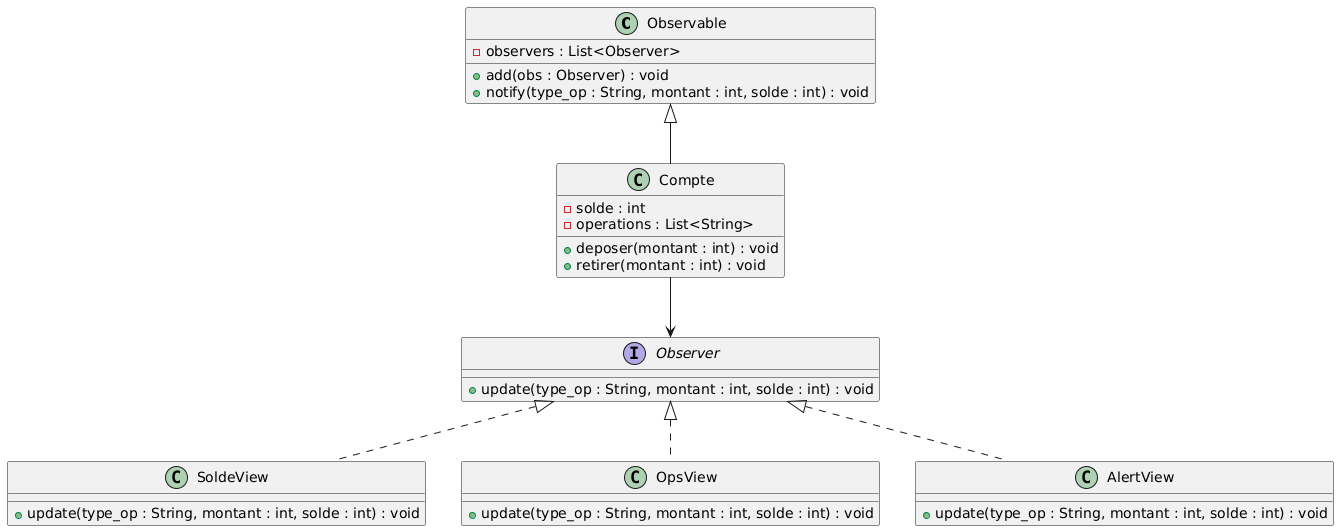

**Étape 4 : MVC**

*Modèle(Code)*

In [10]:
class CompteModel(Observable):
    def __init__(self):
        super().__init__()
        self.solde = 0
        self.operations = []

    def deposer(self, montant):
        self.solde += montant
        self.operations.append(f"+{montant}dt")
        self.notify("depot", montant, self.solde)

    def retirer(self, montant):
        self.solde -= montant
        self.operations.append(f"-{montant}dt")
        self.notify("retrait", montant, self.solde)


*Vues(Code)*

In [11]:
class SoldeView:
    def update(self, type_op, montant, solde):
        print(f"[SOLDE] {solde}dt")

class OpsView:
    def update(self, type_op, montant, solde):
        print(f"[OPERATION] {type_op} {montant}dt")

class AlertView:
    def update(self, type_op, montant, solde):
        if solde < 0:
            print("⚠️ ALERTE : solde négatif !")


*Contrôleur(Code)*

In [12]:
class CompteController:
    def __init__(self, model):
        self.model = model

    def deposer(self, montant):
        self.model.deposer(montant)

    def retirer(self, montant):
        self.model.retirer(montant)


*Exemple d’utilisation*

In [13]:
if __name__ == "__main__":
    compte = CompteModel()
    controller = CompteController(compte)

    # Attacher les vues
    compte.add(SoldeView())
    compte.add(OpsView())
    compte.add(AlertView())

    controller.deposer(100)
    controller.retirer(50)
    controller.retirer(100)


[SOLDE] 100dt
[OPERATION] depot 100dt
[SOLDE] 50dt
[OPERATION] retrait 50dt
[SOLDE] -50dt
[OPERATION] retrait 100dt
⚠️ ALERTE : solde négatif !


*UML*

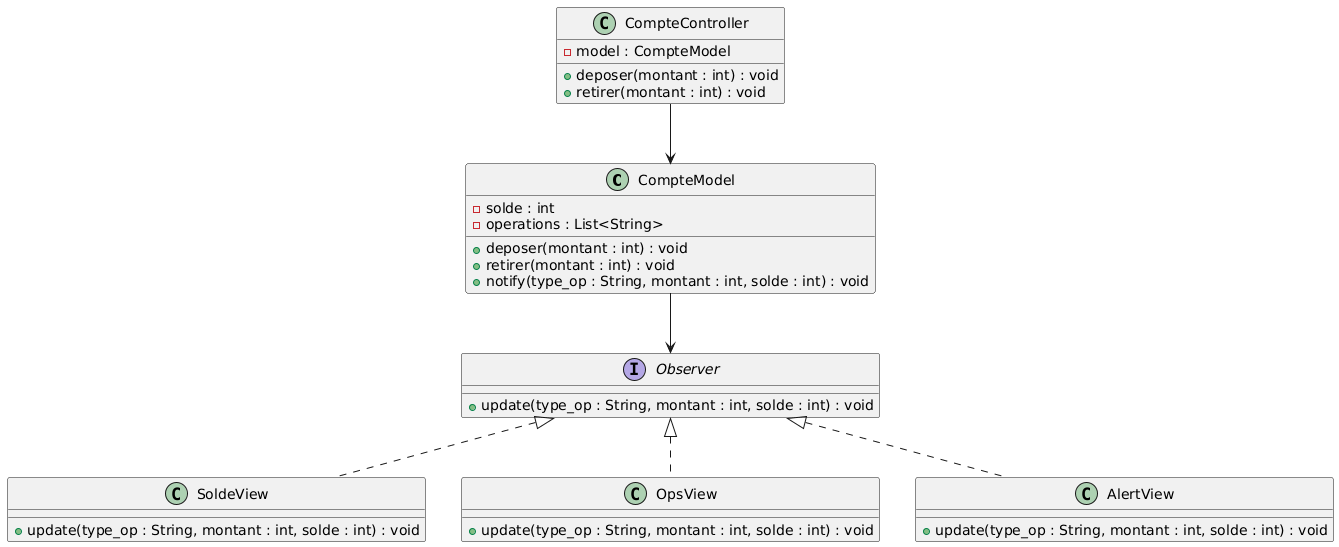